# 0.) Import and Clean data

In [7]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [9]:
#drive.mount('/content/gdrive/', force_remount = True)

In [10]:
df = pd.read_csv('W8_bank-additional-full.csv', sep=';')

In [11]:
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [13]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [14]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

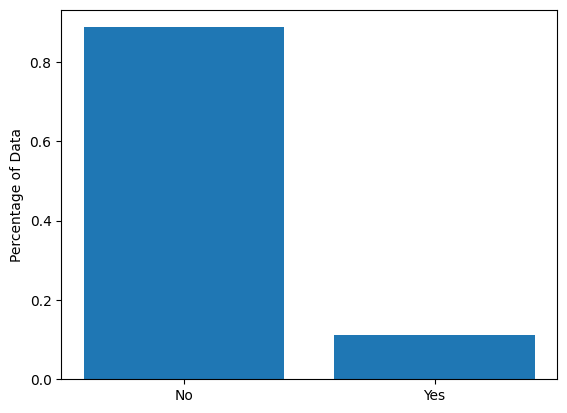

In [15]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [16]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [17]:
# use your own way to process the data
from imblearn.combine import SMOTETomek
from sklearn.datasets import make_classification
from collections import Counter

# Generate an example imbalanced dataset

yes = len(y_train[y_train.yes==1])
no = len(y_train[y_train.yes==0])
print("yes: ",yes)
print("no: ",no)

# Apply SMOTE-Tomek resampling
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

# Print class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))
yes = len(y_resampled[y_resampled.yes==1])
no = len(y_resampled[y_resampled.yes==0])
print("yes: ",yes)
print("no: ",no)

X_train,y_train = X_resampled,y_resampled

yes:  3251
no:  25580
Class distribution after resampling: Counter({'yes': 1})
yes:  25323
no:  25323


# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [18]:
dtree_main = DecisionTreeClassifier(max_depth = 3,criterion='gini',random_state=69)
dtree_main.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=69)

[Text(0.5, 0.875, 'duration <= 249.5\ngini = 0.5\nsamples = 50646\nvalue = [25323, 25323]\nclass = No'),
 Text(0.25, 0.625, 'contact_telephone <= 0.5\ngini = 0.377\nsamples = 23971\nvalue = [17919, 6052]\nclass = No'),
 Text(0.125, 0.375, 'duration <= 134.5\ngini = 0.455\nsamples = 16926\nvalue = [11000, 5926]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.286\nsamples = 7730\nvalue = [6391, 1339]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 9196\nvalue = [4609, 4587]\nclass = No'),
 Text(0.375, 0.375, 'month_oct <= 0.5\ngini = 0.035\nsamples = 7045\nvalue = [6919, 126]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.029\nsamples = 6969\nvalue = [6866, 103]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.422\nsamples = 76\nvalue = [53.0, 23.0]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 0.5\ngini = 0.401\nsamples = 26675\nvalue = [7404, 19271]\nclass = Yes'),
 Text(0.625, 0.375, 'month_jul <= 0.5\ngini = 0.315\nsamples = 22527\nvalue = [4413, 18114]\nclass = Yes'),

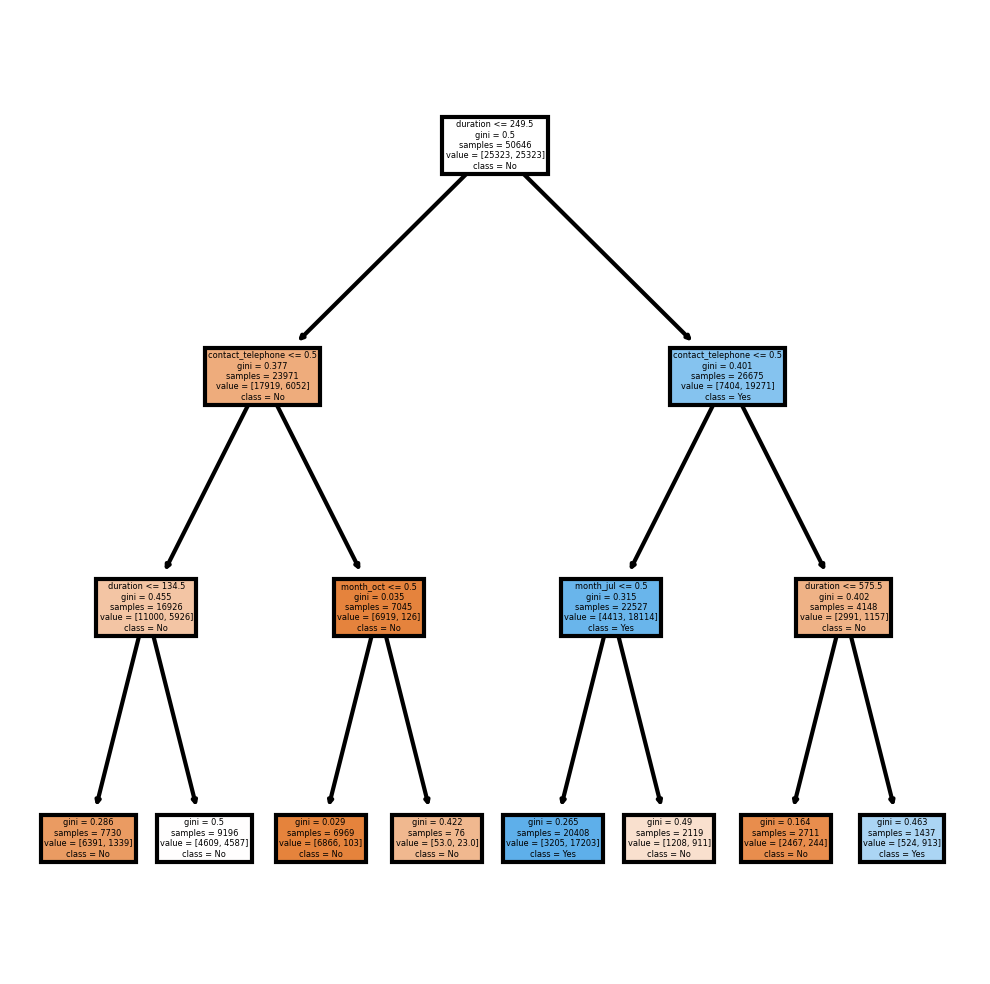

In [19]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [20]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


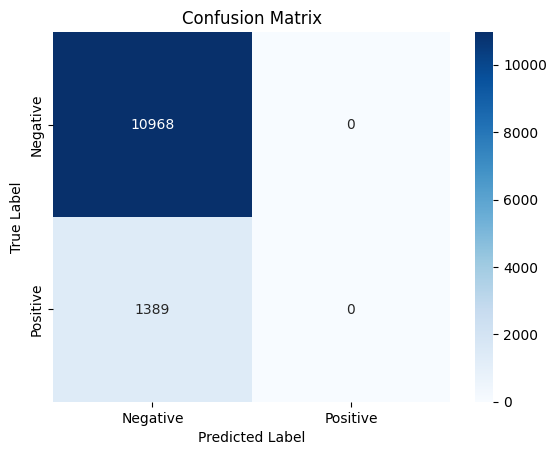

In [21]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [22]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [23]:
bagging = BaggingClassifier(estimator=dtree,
                 n_estimators = 100,
                 max_samples = 0.5,
                 max_features = 1.)

In [24]:
bagging.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=0.5, n_estimators=100)

In [25]:
y_pred_bag = bagging.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred_bag)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


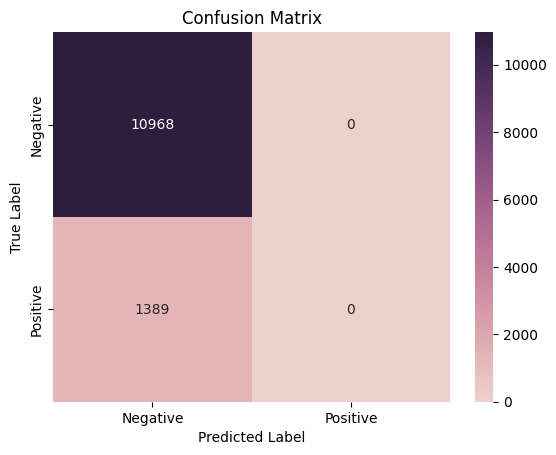

accuracy_score:   0.8875940762320952


In [26]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# accuracy score
print("accuracy_score:  ",accuracy_score(y_test, y_pred_bag))

# 4.) Boost your tree

In [27]:
from sklearn.ensemble import AdaBoostClassifier

In [28]:
boost = AdaBoostClassifier(estimator=dtree,
                           n_estimators = 100)
boost.fit(X_train,y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100)

In [29]:
y_pred_bt = boost.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred_bt)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


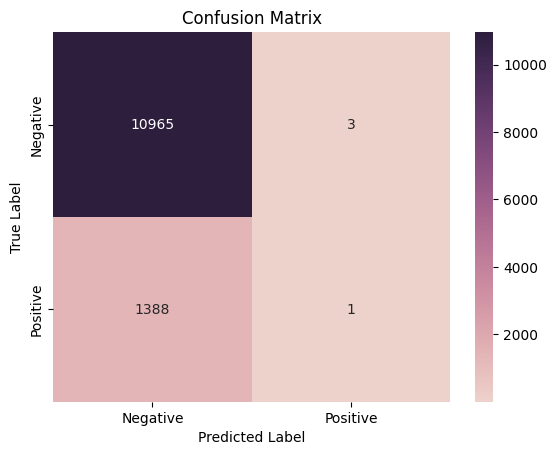

In [30]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import mlens

In [32]:
base_predictions =[list(dtree_main.predict(X_train)),
list(boost.predict(X_train)),
list(bagging.predict(X_train))]
n = len(base_predictions[0])
print("number of predictions: ",n)
base_predictions = np.array(base_predictions).T
super_learner = LogisticRegression()
super_learner.fit(base_predictions,y_train)
print(pd.DataFrame(super_learner.coef_,columns = ["Decision Tree","AdaBoost","Bagging"],index=["Coef"]))


number of predictions:  50646
      Decision Tree  AdaBoost   Bagging
Coef       0.466676   5.09892  0.788161


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 6.)